In [1]:
# Import modules
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore')
import pickle 
from numpy.linalg import inv
import statistics 
import scipy.optimize as solver
from functools import reduce
from numpy.linalg import inv,norm
import datetime as dt
import pickle 
import matplotlib.pyplot as plt

In [2]:
with open('Factor_SP500', 'rb') as f_Factor_SP500: 
    Factor_SP500 = pickle.load(f_Factor_SP500)

In [3]:
with open('HL1M_Qspread', 'rb') as f_HL1M_Qspread: 
    HL1M_Qspread = pickle.load(f_HL1M_Qspread)

In [4]:
with open('HL1M_RET_Sort_top', 'rb') as f_HL1M_RET_Sort_top: 
    HL1M_RET_Sort_top = pickle.load(f_HL1M_RET_Sort_top)

In [5]:
with open('HL1M_RET_Sort_bottom', 'rb') as f_HL1M_RET_Sort_bottom: 
    HL1M_RET_Sort_bottom = pickle.load(f_HL1M_RET_Sort_bottom)

In [6]:
with open('HL1M_Factor_Sort', 'rb') as f_HL1M_Factor_Sort: 
    HL1M_Factor_Sort = pickle.load(f_HL1M_Factor_Sort)

In [7]:
with open('Factor_RET', 'rb') as f_Factor_RET: 
    Factor_RET = pickle.load(f_Factor_RET)

In [8]:
with open('Factor_MV', 'rb') as f_Factor_MV: 
    Factor_MV = pickle.load(f_Factor_MV)

In [9]:
with open('Date_unique', 'rb') as f_Date_unique: 
    Date_unique = pickle.load(f_Date_unique)

In [10]:
with open('Gvkey_unique', 'rb') as f_Gvkey_unique: 
    Gvkey_unique = pickle.load(f_Gvkey_unique)

In [11]:
for i in Factor_SP500:
    i.set_index('gvkey',inplace=True)

## Part 1: Preparing the Dataset

**Extract the return data** 

In [12]:
ref_row = Date_unique.index(201012)
reference = Factor_SP500[ref_row]
sp_members = reference[(reference['sp500']==1)].index
sp_members

Int64Index([  1075,   1078,   1161,   1177,   1209,   1300,   1356,   1408,
              1440,   1447,
            ...
            176404, 177376, 178310, 179534, 179621, 179700, 180167, 180833,
            183257, 260774],
           dtype='int64', name='gvkey', length=469)

In [13]:
#set the index of each dataframe to the company gvkeys
for i in Factor_RET:
    i.set_index('gvkey',inplace=True)

In [14]:
Returns = Factor_RET[0]
for i in Factor_RET[1:]:
    Returns = pd.concat([Returns,i],axis=1)

Returns.columns = Date_unique
Returns = Returns.T
Returns = Returns[sp_members.to_numpy()]      #filter out the non-sp members
Returns

gvkey,1075,1078,1161,1177,1209,1300,1356,1408,1440,1447,...,176404,177376,178310,179534,179621,179700,180167,180833,183257,260774
197001,-8.0936,-4.2157,NaN,-9.0323,-11.3923,-3.5897,-8.5965,-8.3916,-7.8838,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197002,14.1935,3.5959,NaN,16.3121,19.2641,1.2766,13.1670,1.6031,10.0360,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197003,-1.6949,-3.1405,NaN,11.2195,6.7278,1.0638,-3.5836,1.9084,3.3195,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197004,-6.2299,-5.4266,NaN,-11.6022,-6.0171,-13.6842,-8.4956,2.2472,-9.6386,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197005,-5.5901,-9.7826,NaN,-8.1250,-9.7561,-2.1951,-16.9053,1.5385,-4.3200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201908,4.4837,-2.0436,3.2841,NaN,-1.0295,-4.0705,NaN,NaN,4.5667,-3.2162,...,NaN,-10.3967,-15.7018,1.7247,-13.7783,NaN,NaN,NaN,NaN,-1.3960
201909,1.8466,-1.9339,-7.8219,NaN,-1.2836,2.7822,NaN,NaN,2.7866,-1.7363,...,NaN,1.4005,0.4211,-4.8722,6.9496,NaN,NaN,NaN,NaN,1.4157
201910,-3.0390,0.3107,17.0404,NaN,-3.8763,2.0863,NaN,NaN,0.7471,-0.4819,...,NaN,-1.0236,-3.4516,3.9823,7.2567,NaN,NaN,NaN,NaN,1.0187
201911,-6.3191,2.2007,15.3846,NaN,10.8178,3.8905,NaN,NaN,-2.4791,2.4216,...,NaN,6.2921,-11.2596,3.3266,1.8296,NaN,NaN,NaN,NaN,6.4799


In [15]:
#separate the data to two portions, insample and out of sample
IS_return = Returns.loc[197001:201012]
OS_return = Returns.loc[201101:201912]

In [16]:
#apply the required filters
set1 = []
for i in IS_return.columns:
    if IS_return[i].count() >= 200:
        set1.append(i)

set2 = []
for i in OS_return.columns:
    if OS_return[i].count() >= 50:
        set2.append(i)

final_list = list(set(set1).intersection(set2))
print(final_list)

[10247, 4108, 14359, 10277, 2086, 4145, 8245, 8247, 8253, 28733, 2111, 20548, 6216, 8264, 8272, 2136, 10332, 16478, 12389, 4199, 2154, 8304, 4213, 6266, 6268, 2184, 14477, 24731, 6304, 6307, 10405, 8358, 12485, 8402, 10453, 2269, 24800, 4321, 10466, 6375, 2285, 12540, 8446, 28930, 10499, 8455, 2312, 24856, 8479, 10530, 6435, 20779, 24893, 4423, 16721, 8530, 8539, 12635, 24925, 8543, 2403, 29028, 8549, 6502, 10614, 2435, 10631, 4494, 4503, 8606, 4517, 12726, 4560, 12756, 29150, 25056, 14824, 2547, 12788, 29173, 4598, 8694, 6649, 6653, 4611, 6669, 2574, 8717, 4640, 25124, 10793, 12850, 29241, 8762, 4674, 6730, 6733, 6742, 4699, 2663, 8810, 14960, 4723, 10867, 8823, 6781, 4737, 6788, 12950, 2710, 10903, 6829, 2751, 25279, 25283, 29389, 29392, 4818, 4839, 10983, 25338, 25340, 8972, 25356, 4885, 11060, 2884, 13125, 25434, 9063, 7017, 4988, 4990, 2968, 7065, 7085, 2991, 5046, 3024, 11220, 11228, 7146, 7154, 9203, 3062, 11259, 7163, 11264, 7171, 5125, 13341, 9248, 3107, 11300, 9258, 3121, 107

In [17]:
Returns = Returns[final_list]
IS_return = IS_return[final_list]
OS_return = OS_return[final_list]

IS_return.head()

gvkey,10247,4108,14359,10277,2086,4145,8245,8247,8253,28733,...,4058,4060,4066,2019,14324,4087,6136,2044,4093,4094
197001,NaN,NaN,NaN,1.9130,0.8439,-18.1319,NaN,-14.0845,NaN,NaN,...,-10.2639,-2.0036,NaN,-4.1667,NaN,-7.6190,NaN,-15.9472,-11.0169,-0.8547
197002,NaN,NaN,NaN,0.0000,10.0418,0.6711,NaN,10.9836,NaN,NaN,...,5.6863,4.8327,NaN,17.0329,NaN,2.3196,NaN,9.9999,0.3810,-4.0517
197003,NaN,NaN,NaN,4.3011,-4.1065,-20.0000,NaN,-8.9552,NaN,NaN,...,1.8634,2.8724,NaN,-7.5117,NaN,-1.0204,NaN,4.1559,2.4038,-4.2889
197004,NaN,NaN,NaN,-10.5155,-14.2857,-18.8333,NaN,-7.7869,NaN,NaN,...,0.0000,-8.0000,NaN,-9.1370,NaN,12.3711,NaN,-13.8404,-9.3897,-14.8585
197005,NaN,NaN,NaN,-10.4651,-4.1667,-3.0928,NaN,-5.4222,NaN,NaN,...,-19.3902,-5.8601,NaN,-2.8248,NaN,7.5688,NaN,-17.3913,-2.6943,1.4958


In [18]:
#calculate the insample and out of sample covariance matrices
IS_cov = IS_return.cov().to_numpy()
OS_cov = OS_return.cov().to_numpy()

**Extract the HL1M factor matrix**

In [19]:
HL1M_Factor_Sort=HL1M_Factor_Sort[1:]
for i in HL1M_Factor_Sort:
    i.set_index('gvkey',inplace=True)

In [20]:
HL1M_factor = HL1M_Factor_Sort[0]
for i in HL1M_Factor_Sort[1:]:
    HL1M_factor = pd.concat([HL1M_factor,i],axis=1)

HL1M_factor.columns = Date_unique[1:]
HL1M_factor = HL1M_factor.T
HL1M_factor = HL1M_factor[final_list]
HL1M_factor

gvkey,10247,4108,14359,10277,2086,4145,8245,8247,8253,28733,...,4058,4060,4066,2019,14324,4087,6136,2044,4093,4094
197002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.500000,NaN,NaN,...,NaN,inf,NaN,NaN,NaN,15.666533,NaN,NaN,NaN,NaN
197003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083333,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,0.340909,NaN,NaN,NaN,NaN
197004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000,NaN,NaN,...,NaN,0.941085,NaN,NaN,NaN,2.071253,NaN,NaN,NaN,NaN
197005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.444444,NaN,NaN,...,NaN,5.299496,NaN,NaN,NaN,0.378944,NaN,NaN,NaN,NaN
197006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.062500,NaN,NaN,...,NaN,1.172474,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201908,6.720588,9.875000,3.062857,NaN,0.853639,9.275862,0.279897,0.716277,0.866242,0.736453,...,2.144130,1.617940,4.058824,0.164798,NaN,NaN,0.857143,NaN,7.054545,NaN
201909,0.108609,2.286689,1.457706,NaN,0.078682,1.410180,2.227134,1.552083,1.553936,0.022665,...,0.487256,1.210753,3.377622,3.532468,NaN,NaN,9.687500,NaN,0.094868,NaN
201910,0.022361,0.530864,3.209677,NaN,0.817276,0.609319,0.140656,0.260460,0.374034,0.280864,...,0.224414,0.520085,1.304217,0.533333,NaN,NaN,0.141026,NaN,0.266289,NaN
201911,0.011905,0.195195,2.703980,NaN,12.038835,0.283837,0.201800,0.088550,0.159780,0.236702,...,0.121008,1.953947,0.506452,0.083497,NaN,NaN,0.352941,NaN,3.344086,NaN


## Part 2: Portfolio Optimization by Black-Litterman

In [21]:
#prepare the market value dataset to calculate w_eq
for i in Factor_MV:
    i.set_index('gvkey',inplace=True)

In [22]:
#create the value weighted portfolio based on dec 2010 data
MV_list = Factor_MV[491].T[final_list]
total = MV_list.loc['MV'].sum()

w_eq = (MV_list.loc['MV']/total)
print(w_eq)

gvkey
10247    0.003132
4108     0.003004
14359    0.003060
10277    0.002932
2086     0.003204
           ...   
4087     0.003261
6136     0.002973
2044     0.003039
4093     0.003174
4094     0.002941
Name: MV, Length: 322, dtype: float64


In [23]:
for i in HL1M_RET_Sort_top[1:]:
    i.set_index('gvkey',inplace=True)
for i in HL1M_RET_Sort_bottom[1:]:
    i.set_index('gvkey',inplace=True)

In [24]:
top_companies = HL1M_RET_Sort_top[491].index
bottom_companies = HL1M_RET_Sort_bottom[491].index

top1 = list(set(top_companies.tolist()).intersection(final_list))
topsize=len(top1)
bottom1 = list(set(bottom_companies.tolist()).intersection(final_list))
bottomsize=len(bottom1)

In [25]:
P_df = pd.DataFrame(columns = final_list,index=['P'])

for i in top1:
    P_df[i] = 1/topsize
for i in bottom1:
    P_df[i] = -1/bottomsize

P_df = P_df.fillna(0)
P = P_df.loc['P']

In [26]:
def BlackLitterman(tao, delta):
    Q = statistics.mean(HL1M_Qspread[1:492])
    Omega = statistics.stdev(HL1M_Qspread[1:492]) ** 2
    
    A = Omega/tao + reduce(np.matmul,[P,IS_cov,P.T]) / (1+tao)
    Pi = delta * np.dot(IS_cov,w_eq)
    
    Lambda = (tao/Omega)*Q/tao - (1/A)*reduce(np.matmul,[P,IS_cov,w_eq]) - ((1/A)*(tao/Omega)*(Q/delta)/(1+tao))*reduce(np.matmul,[P,IS_cov,P.T])
    w_opt = (w_eq+P.T*Lambda)/(1+tao)
    w_opt = w_opt/sum(w_opt)
    
    return w_opt

In [27]:
w_opt=BlackLitterman (0.5, 10)
w_opt

gvkey
10247    0.003132
4108     0.003004
14359   -0.000207
10277    0.002932
2086     0.006039
           ...   
4087     0.003261
6136    -0.000295
2044     0.003039
4093     0.003174
4094     0.002941
Length: 322, dtype: float64

### Question 2.1

Text(0, 0.5, 'Weight')

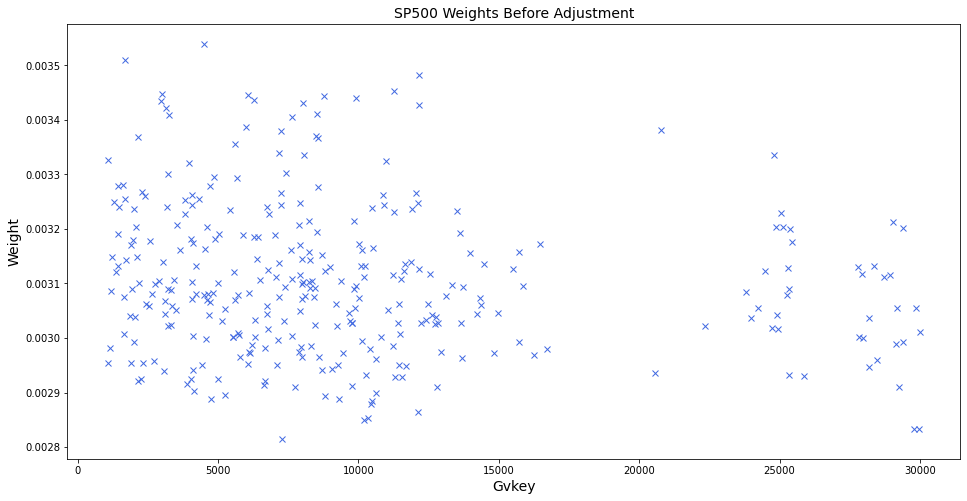

In [28]:
aa = pd.DataFrame(w_eq)
bb = pd.DataFrame(w_opt,columns = ['weight'])
x1 = aa.index
y1 = aa.MV

plt.figure(figsize=(16,8))
plt.plot(x1,y1,'x', c='royalblue')
plt.title("SP500 Weights Before Adjustment", fontsize=14)
plt.xlabel("Gvkey", fontsize=14)
plt.ylabel("Weight", fontsize=14)

Text(0, 0.5, 'Weight')

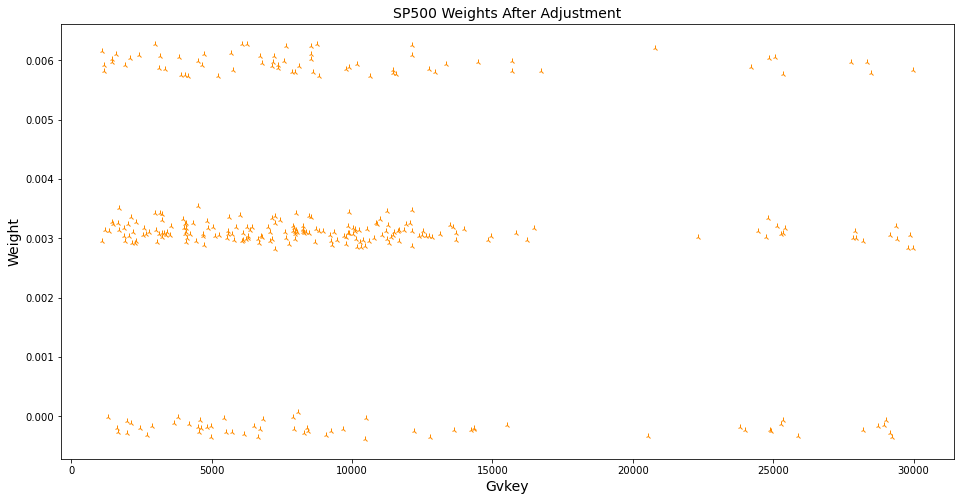

In [29]:
x2 = bb.index
y2 = bb.weight

plt.figure(figsize=(16,8))
plt.plot(x2,y2,'2', c='darkorange')
plt.title("SP500 Weights After Adjustment", fontsize=14)
plt.xlabel("Gvkey", fontsize=14)
plt.ylabel("Weight", fontsize=14)

### Question 2.2

def mergedate(x):
    return dt.datetime.strptime(x, "%Y%m")

In [30]:
WRet_B = w_eq*IS_return
ExpRet_B = WRet_B.mean(axis =0)
ExpRet_B

gvkey
10247    0.004877
4108     0.005518
14359    0.005865
10277    0.002756
2086     0.003242
           ...   
4087     0.003340
6136     0.004245
2044     0.003854
4093     0.003163
4094     0.003779
Length: 322, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

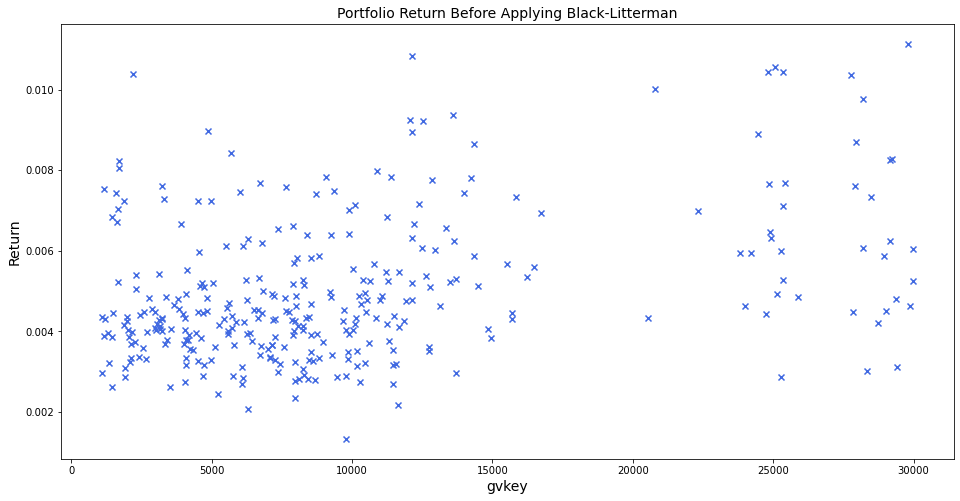

In [31]:
df_B = pd.DataFrame(ExpRet_B)
x_B = df_B.index
y_B = df_B.values
plt.figure(figsize=(16,8))
plt.scatter(x_B, y_B, c='royalblue', marker='x')
plt.title("Portfolio Return Before Applying Black-Litterman", fontsize=14)
plt.xlabel("gvkey", fontsize=14)
plt.ylabel("Return", fontsize=14)
plt.show

In [32]:
WRet_A = w_opt*IS_return
ExpRet_A = WRet_A.mean(axis =0)
ExpRet_A

gvkey
10247    0.004877
4108     0.005518
14359   -0.000397
10277    0.002756
2086     0.006112
           ...   
4087     0.003340
6136    -0.000421
2044     0.003854
4093     0.003163
4094     0.003779
Length: 322, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

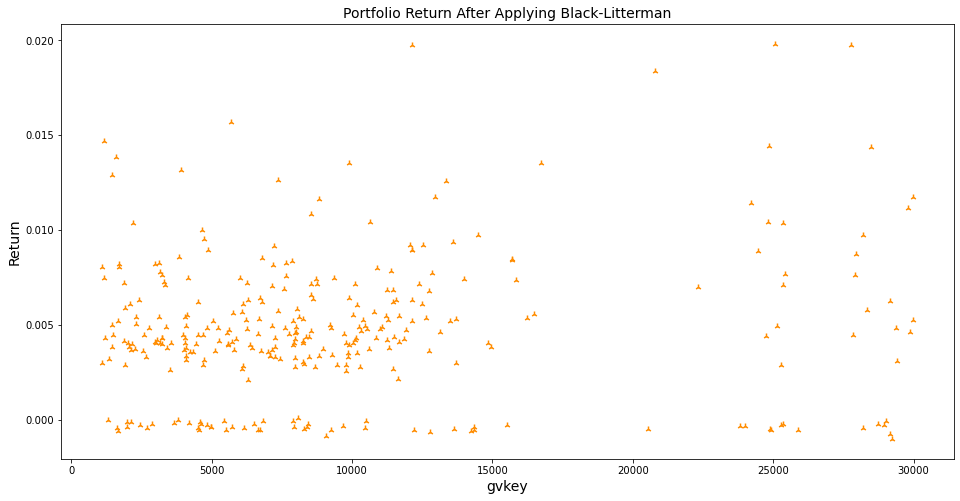

In [33]:
df_A = pd.DataFrame(ExpRet_A)
x_A = df_A.index
y_A = df_A.values
plt.figure(figsize=(16,8))
plt.scatter(x_A, y_A, c='darkorange', marker='2')
plt.title("Portfolio Return After Applying Black-Litterman", fontsize=14)
plt.xlabel("gvkey", fontsize=14)
plt.ylabel("Return", fontsize=14)
plt.show

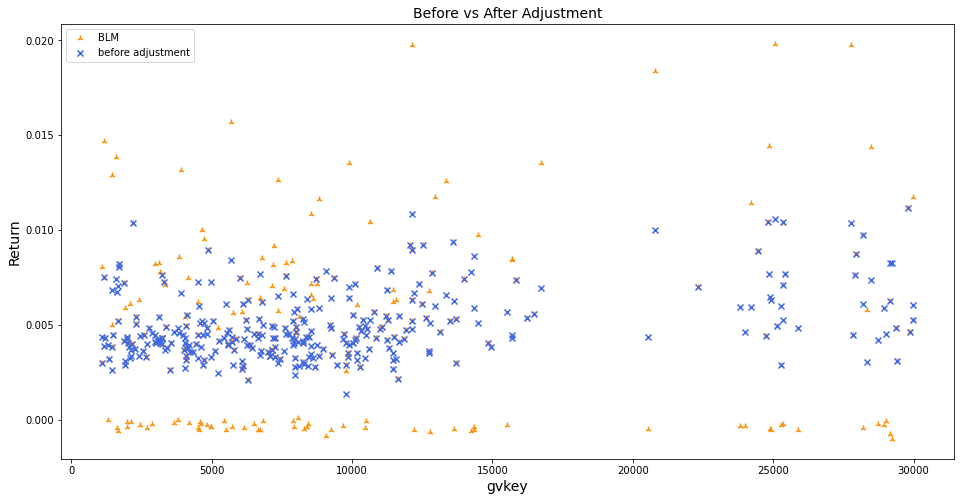

In [34]:
plt.figure(figsize=(16,8))
plt.scatter(x_A, y_A, marker='2',c='darkorange', label='BLM') 
plt.scatter(x_B,y_B, marker='x',c='royalblue', label='before adjustment') 
plt.title("Before vs After Adjustment", fontsize=14)
plt.xlabel('gvkey', fontsize=14)
plt.ylabel('Return', fontsize=14)
plt.legend(loc='best')
plt.show()

### Question 2.3

In [35]:
#create a matrix for comparison of the weights
df_weights = pd.DataFrame(index = ['w_eq','w_opt','diff'],columns=HL1M_factor.columns)
df_weights.loc['w_eq']=w_eq
df_weights.loc['w_opt']=w_opt
df_weights.loc['diff'] = df_weights.loc['w_opt'] - df_weights.loc['w_eq']
df_weights.loc['abs_diff'] = abs(df_weights.loc['diff'])

In [36]:
#define a function to clean the small numbers to zero in the final output table
def cleanzeros(x):
    if abs(x) <= 0.00000001:
        return 0
    else:
        return x
df_weights.applymap(cleanzeros)

gvkey,10247,4108,14359,10277,2086,4145,8245,8247,8253,28733,...,4058,4060,4066,2019,14324,4087,6136,2044,4093,4094
w_eq,0.003132,0.003004,0.003060,0.002932,0.003204,0.002902,0.003214,0.003102,0.003158,0.003112,...,0.003072,0.003243,0.003103,0.003236,0.003074,0.003261,0.002973,0.003039,0.003174,0.002941
w_opt,0.003132,0.003004,-0.000207,0.002932,0.006039,0.005737,0.003214,0.003102,0.003158,-0.000156,...,0.003072,0.003243,0.003103,0.003236,-0.000193,0.003261,-0.000295,0.003039,0.003174,0.002941
diff,0.000000,0.000000,-0.003267,0.000000,0.002835,0.002835,0.000000,0.000000,0.000000,-0.003267,...,0.000000,0.000000,0.000000,0.000000,-0.003267,0.000000,-0.003267,0.000000,0.000000,0.000000
abs_diff,0.000000,0.000000,0.003267,0.000000,0.002835,0.002835,0.000000,0.000000,0.000000,0.003267,...,0.000000,0.000000,0.000000,0.000000,0.003267,0.000000,0.003267,0.000000,0.000000,0.000000


In [37]:
sorted_weights = df_weights.sort_values(by='diff',axis=1)       #for calculation of bullish and bearish stocks
sorted_weights1 = df_weights.sort_values(by='abs_diff',axis=1) #for calculation of neutral stocks
sorted_weights

gvkey,5518,29150,12788,6649,5709,29241,10466,2710,25880,8304,...,8606,3905,3835,20779,3170,8530,6730,8539,6066,2086
w_eq,0.00300148,0.00298931,0.00290955,0.00291415,0.00300918,0.00290964,0.00288366,0.00295771,0.00293016,0.00298594,...,0.00296576,0.00291563,0.00322684,0.00338216,0.00324028,0.00341108,0.00323931,0.00319475,0.00344595,0.00320361
w_opt,-0.000266005,-0.000278175,-0.000357936,-0.000353336,-0.0002583,-0.000357842,-0.000383827,-0.000309779,-0.000337321,-0.000281541,...,0.00580079,0.00575065,0.00606186,0.00621718,0.0060753,0.00624611,0.00607433,0.00602978,0.00628097,0.00603864
diff,-0.00326748,-0.00326748,-0.00326748,-0.00326748,-0.00326748,-0.00326748,-0.00326748,-0.00326748,-0.00326748,-0.00326748,...,0.00283502,0.00283502,0.00283502,0.00283502,0.00283502,0.00283502,0.00283502,0.00283502,0.00283502,0.00283502
abs_diff,0.00326748,0.00326748,0.00326748,0.00326748,0.00326748,0.00326748,0.00326748,0.00326748,0.00326748,0.00326748,...,0.00283502,0.00283502,0.00283502,0.00283502,0.00283502,0.00283502,0.00283502,0.00283502,0.00283502,0.00283502


In [38]:
bearish = sorted_weights.iloc[:,0:5].columns.to_list()
bullish = sorted_weights.iloc[:,-5:].columns.to_list()
neutral = sorted_weights1.iloc[:,0:5].columns.to_list()

In [39]:
bear_stocks = pd.DataFrame(index = bearish,columns=['prior weight (%)','views (%)',
                                                    'posterior weight (%)','prior expected return (%)',
                                                    'posterior expected return (%)'])
bull_stocks = pd.DataFrame(index = bullish,columns=['prior weight (%)','views (%)',
                                                    'posterior weight (%)','prior expected return (%)',
                                                    'posterior expected return (%)'])
neutral_stocks = pd.DataFrame(index = neutral,columns=['prior weight (%)','views (%)',
                                                    'posterior weight (%)','prior expected return (%)',
                                                    'posterior expected return (%)'])

In [40]:
bear_stocks['prior weight (%)'] = sorted_weights[bearish].loc['w_eq'] 
bear_stocks['prior expected return (%)'] = IS_return[bearish].mean()*bear_stocks['prior weight (%)']
bear_stocks['views (%)'] = P[bearish]
bear_stocks['posterior weight (%)'] = sorted_weights[bearish].loc['w_opt']
bear_stocks['posterior expected return (%)'] = IS_return[bearish].mean()*bear_stocks['posterior weight (%)']

In [41]:
bull_stocks['prior weight (%)'] = sorted_weights[bullish].loc['w_eq'] 
bull_stocks['prior expected return (%)'] = IS_return[bullish].mean()*bull_stocks['prior weight (%)']
bull_stocks['views (%)'] = P[bullish]
bull_stocks['posterior weight (%)'] = sorted_weights[bullish].loc['w_opt']
bull_stocks['posterior expected return (%)'] = IS_return[bullish].mean()*bull_stocks['posterior weight (%)']

In [42]:
neutral_stocks['prior weight (%)'] = sorted_weights[neutral].loc['w_eq'] 
neutral_stocks['prior expected return (%)'] = IS_return[neutral].mean()*neutral_stocks['prior weight (%)']
neutral_stocks['views (%)'] = P[neutral]
neutral_stocks['posterior weight (%)'] = sorted_weights[neutral].loc['w_opt']
neutral_stocks['posterior expected return (%)'] = IS_return[neutral].mean()*neutral_stocks['posterior weight (%)']

In [43]:
bear_stocks = bear_stocks*100
bull_stocks = bull_stocks*100
neutral_stocks = neutral_stocks*100

In [44]:
bear_stocks

,prior weight (%),views (%),posterior weight (%),prior expected return (%),posterior expected return (%)
5518,0.300148,-1.694915,-0.0266005,0.610872,-0.0541383
29150,0.298931,-1.694915,-0.0278175,0.826157,-0.0768794
12788,0.290955,-1.694915,-0.0357936,0.51026,-0.0627728
6649,0.291415,-1.694915,-0.0353336,0.432328,-0.052419
5709,0.300918,-1.694915,-0.02583,0.437124,-0.0375215


In [45]:
bull_stocks

,prior weight (%),views (%),posterior weight (%),prior expected return (%),posterior expected return (%)
8530,0.341108,1.470588,0.624611,0.390817,0.715634
6730,0.323931,1.470588,0.607433,0.341836,0.64101
8539,0.319475,1.470588,0.602978,0.348361,0.657497
6066,0.344595,1.470588,0.628097,0.31156,0.567883
2086,0.320361,1.470588,0.603864,0.324249,0.611191


In [46]:
neutral_stocks

,prior weight (%),views (%),posterior weight (%),prior expected return (%),posterior expected return (%)
29392,0.299349,0.0,0.299349,0.31151,0.31151
7637,0.300373,0.0,0.300373,0.758975,0.758975
4423,0.29508,0.0,0.29508,0.397132,0.397132
28195,0.294706,0.0,0.294706,0.976012,0.976012
27845,0.300207,0.0,0.300207,0.447081,0.447081


### Question 2.4

In [47]:
OS_return = OS_return[final_list]

In [48]:
#calculate the portfolio return and standard deviation for the value-weighted S&P 500portfolio 
def MVport_stats(w_eq,OS_return):
    MVport_mean = sum(w_eq*OS_return.mean())
    MVport_std = np.sqrt(reduce(np.dot, [w_eq, OS_return.cov(), w_eq.T]))  
    return [MVport_mean,MVport_std]

In [49]:
print(MVport_stats(w_eq,OS_return))

[1.0615232922436406, 3.720882196824195]


In [50]:
#calculate the portfolio sharpe-ratio for the value-weighted S&P 500 portfolio 
def sharpe_MVport(w_eq):
    mu = np.dot(w_eq,OS_return.mean())
    S = reduce(np.dot, [w_eq, OS_cov, w_eq.T])
    sq=S**0.5
    return (mu/sq)
print(sharpe_MVport(w_eq))

0.28528806774631543


In [51]:
#calculate the portfolio return and standard deviation for the Black-Litterman Portfolio
def BLport_stats(w_opt,OS_return):
    BLport_mean = sum(w_opt*OS_return.mean())
    BLport_std = np.sqrt(reduce(np.dot, [w_opt, OS_return.cov(), w_opt.T]))  
    return [BLport_mean,BLport_std]

In [52]:
print(BLport_stats(w_opt,OS_return))

[1.0981800499483139, 3.621359212020745]


In [53]:
#calculate the portfolio sharpe ratio for the Black-Litterman Portfolio
def sharpe_BLport(w_opt):
    BL_mu = np.dot(w_opt,OS_return.mean())
    BL_S = reduce(np.dot, [w_opt, OS_cov, w_opt.T])
    BL_sq=BL_S**0.5
    return (BL_mu/BL_sq)
print(sharpe_BLport(w_opt))

0.30325079221719103


In [54]:
#Create a DataFrame to deliver the output results 
Comp_table = pd.DataFrame(index=['S&P500','Black-Litterman Updated Portfolio'], 
                       columns = ['Mean Return','Std.Dev','Sharpe Ratio'])
                                                                                                 

In [55]:
#Calculate the portfolio statistics using insample data
Comp_table.loc['S&P500']['Mean Return']= MVport_stats(w_eq,OS_return)[0]
Comp_table.loc['S&P500']['Std.Dev']= MVport_stats(w_eq,OS_return)[1]
Comp_table.loc['S&P500']['Sharpe Ratio']= sharpe_MVport(w_eq)
Comp_table.loc['Black-Litterman Updated Portfolio']['Mean Return']= BLport_stats(w_opt,OS_return)[0]
Comp_table.loc['Black-Litterman Updated Portfolio']['Std.Dev']= BLport_stats(w_opt,OS_return)[1]
Comp_table.loc['Black-Litterman Updated Portfolio']['Sharpe Ratio']= sharpe_BLport(w_opt)
Comp_table

,Mean Return,Std.Dev,Sharpe Ratio
S&P500,1.06152,3.72088,0.285288
Black-Litterman Updated Portfolio,1.09818,3.62136,0.303251


### Question 2.5

In [56]:
w_opt2=BlackLitterman(0.01,10)
w_opt3=BlackLitterman(0.5,50)
display(w_opt2,w_opt3)

gvkey
10247    0.003132
4108     0.003004
14359    0.001505
10277    0.002932
2086     0.004553
           ...   
4087     0.003261
6136     0.001418
2044     0.003039
4093     0.003174
4094     0.002941
Length: 322, dtype: float64

gvkey
10247    0.003132
4108     0.003004
14359   -0.000217
10277    0.002932
2086     0.006047
           ...   
4087     0.003261
6136    -0.000305
2044     0.003039
4093     0.003174
4094     0.002941
Length: 322, dtype: float64

In [57]:
WRet_g1 = w_opt2*OS_return
ExpRet_g1 = WRet_g1.sum(axis =1)

WRet_g2 = w_opt3*OS_return
ExpRet_g2 = WRet_g2.sum(axis =1)

In [58]:
ExpRet_g2

201101    2.373545
201102    3.485534
201103    0.854064
201104    3.002115
201105   -0.553797
            ...   
201908   -2.601094
201909    3.628186
201910    0.735833
201911    2.755737
201912    3.141096
Length: 108, dtype: float64

NameError: name 'mergedate' is not defined

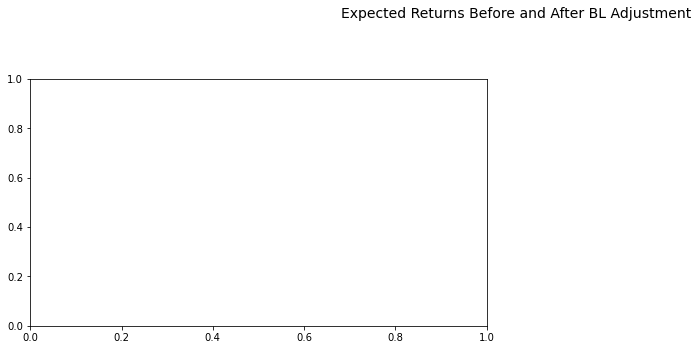

In [59]:
plt.figure(figsize=(18,10))
plt.suptitle("Expected Returns Before and After BL Adjustment", fontsize=14)

plt.subplot(221)  
plt.scatter(ExpRet_B.index.map(str).map(mergedate),ExpRet_B.values,marker='x',c='royalblue', label='before adjustment') 
plt.xlabel('Date', fontsize=14)
plt.ylabel('Before Adjustemnt Return', fontsize=14)

plt.subplot(222) 
plt.scatter(ExpRet_A.index.map(str).map(mergedate), ExpRet_A.values,marker='2',c='darkorange', label='BLM1')
plt.xlabel('Date', fontsize=14)
plt.ylabel("τ=0.5 & δ=10 Weights", fontsize=14)

plt.subplot(223) 
plt.scatter(ExpRet_g1.index.map(str).map(mergedate),ExpRet_g1.values,marker='+',c='lime', label='BLM2')
plt.xlabel('Date', fontsize=14)
plt.ylabel("τ=0.01 & δ=10 Weights", fontsize=14)

plt.subplot(224) 
plt.scatter(ExpRet_g2.index.map(str).map(mergedate),ExpRet_g2.values,marker='.',c='r', label='BLM3') 
plt.xlabel('Date', fontsize=14)
plt.ylabel("τ=0.5 & δ=50 Weights", fontsize=14)

In [ ]:
plt.figure(figsize=(18,10))
plt.suptitle("Expected Returns Before and After BL Adjustment", fontsize=16)

plt.subplot(221)  
plt.plot(ExpRet_B.index.map(str).map(mergedate),ExpRet_B.values,c='royalblue', label='before adjustment') 
plt.xlabel('Date', fontsize=14)
plt.ylabel('Before Adjustemnt Return', fontsize=14)

plt.subplot(222) 
plt.plot(ExpRet_A.index.map(str).map(mergedate), ExpRet_A.values,c='darkorange', label='BLM1')
plt.xlabel('Date', fontsize=14)
plt.ylabel("τ=0.5 & δ=10 Weights", fontsize=14)

plt.subplot(223) 
plt.plot(ExpRet_g1.index.map(str).map(mergedate),ExpRet_g1.values,c='lime', label='BLM2')
plt.xlabel('Date', fontsize=14)
plt.ylabel("τ=0.01 & δ=10 Weights", fontsize=14)

plt.subplot(224) 
plt.plot(ExpRet_g2.index.map(str).map(mergedate),ExpRet_g2.values,c='r', label='BLM3') 
plt.xlabel('Date', fontsize=14)
plt.ylabel("τ=0.5 & δ=50 Weights", fontsize=14)

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Expected Returns Before and After BL Adjustment", fontsize=14)
plt.scatter(ExpRet_B.index.map(str).map(mergedate),ExpRet_B.values,marker='x',c='royalblue', label='before adjustment') 
plt.scatter(ExpRet_A.index.map(str).map(mergedate), ExpRet_A.values,marker='2',c='darkorange', label='τ=0.5 & δ=10') 
plt.scatter(ExpRet_g1.index.map(str).map(mergedate),ExpRet_g1.values,marker='+',c='lime', label='τ=0.01 & δ=10')
plt.scatter(ExpRet_g2.index.map(str).map(mergedate),ExpRet_g2.values,marker='.',c='r', label='τ=0.5 & δ=50') 
plt.xlabel('Date', fontsize=14)
plt.ylabel('Return', fontsize=14)
plt.legend(loc='best')
plt.show()

In [ ]:
tao_2 = pd.DataFrame(w_opt2,columns = ['weight'])
x_2 = tao_2.index
y_2 = tao_2.weight

tao_3 = pd.DataFrame(w_opt3,columns = ['weight'])
x_3 = tao_3.index
y_3 = tao_3.weight

In [ ]:
plt.figure(figsize=(18,10))
plt.suptitle("Sensitivity analysis to the inputs of τ and δ", fontsize=16)

plt.subplot(221)  
plt.plot(x1,y1,'x', c='royalblue')
plt.xlabel("Gvkey", fontsize=14)
plt.ylabel("Equal Weights", fontsize=14)

plt.subplot(222)  
plt.plot(x2,y2,'2', c='darkorange')
plt.xlabel("Gvkey")
plt.ylabel("τ=0.5 & δ=10 Weights", fontsize=14)


plt.subplot(223)  
plt.plot(x_2,y_2,'.',c='lime')
plt.xlabel("Gvkey", fontsize=14)
plt.ylabel("τ=0.01 & δ=10 Weights", fontsize=14)

plt.subplot(224)  
plt.plot(x_3,y_3,'+',c='r')
plt.xlabel("Gvkey", fontsize=14)
plt.ylabel("τ=0.5 & δ=50 Weights", fontsize=14)